## 데이터 시각화 툴 소개

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

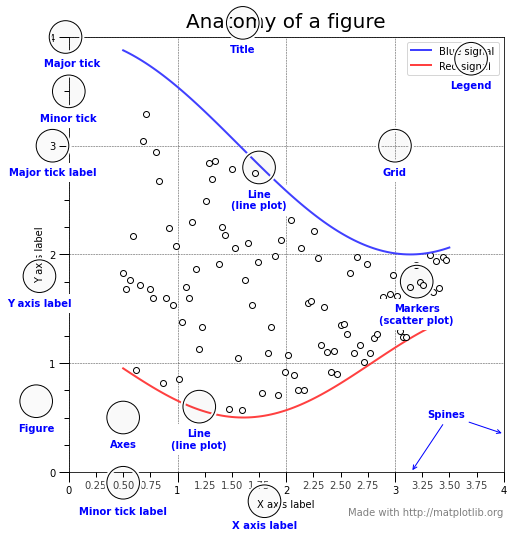

In [7]:

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()



### 데이터 시각화를 위한 폰트설정

In [8]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [9]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'Malgun Gothic'

<AxesSubplot:title={'center':'한글'}>

C:\Users\dell\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dell\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dell\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dell\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0, flags=flags)


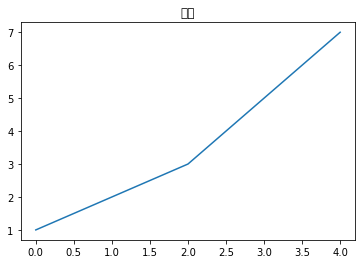

In [12]:
pd.Series([1,2,3,5,7]).plot(title='한글')  #한글 에러 

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [17]:
import matplotlib.pyplot as plt
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.


# ggplot으로 그래프 스타일 설정
plt.style.use('seaborn-dark-palette')

# 폰트설정
plt.rc("font", family =get_font_family())

# 마이너스폰트 설정
plt.rc("axes",unicode_minus=False)


# 그래프에 retina display 적용
from IPytjon.display import set_matplotlib_formats
set_matplotlib_formats("retina")


ModuleNotFoundError: No module named 'IPytjon'

In [15]:
### 그래프 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

<AxesSubplot:title={'center':'한글'}>

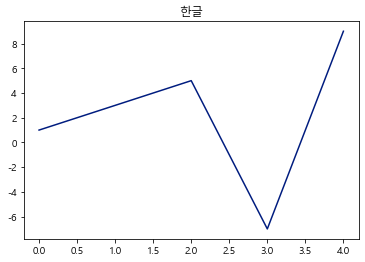

In [18]:
# 한글폰트 확인하기
pd.Series([1,3,5,-7,9]).plot(title='한글') 

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [24]:
df = pd.read_csv("krx.csv")

In [26]:
# Market column에 어떤 데이터들이 있는지 unique로 확인합니다.
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [27]:
# value_counts()로 빈도수를 구합니다.
df["Market"].value_counts()



KOSPI     5475
KOSDAQ    1528
KONEX      137
Name: Market, dtype: int64

<AxesSubplot:>

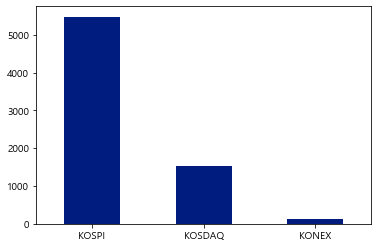

In [30]:
# 빈도수를 시각화 합니다.

# 선그래프
#df["Market"].value_counts().plot()

#범주형이므로 막대로 하는게 더 좋음
df["Market"].value_counts().plot.bar(rot=0) # rot=0: 글씨가 눕히지 앟고 똑바로 하는 거 

<AxesSubplot:xlabel='count', ylabel='Market'>

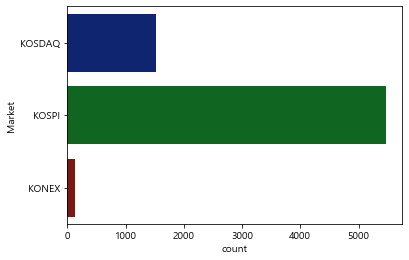

In [34]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df, y='Market')


# hue : seaboen에서 다른 변수를 다른 색상으로 표현하기 위한 코드

### Sector

In [40]:
# 섹터의 빈도수를 구합니다.
# df['Sector'].value_counts()

# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
# sector_count_top
sector_count_top = df['Sector'].value_counts().head(30)

In [41]:
# df_sector_30
# sector_count_top.reset_index()

df_sector_30 = sector_count_top.reset_index()
df_sector_30.columns = ['Sector','count']
df_sector_30.head(1)

,index,Sector
0,특수 목적용 기계 제조업,143
1,소프트웨어 개발 및 공급업,140
2,전자부품 제조업,125
3,자동차 신품 부품 제조업,96
4,의약품 제조업,94
5,기타 화학제품 제조업,93
6,기타 금융업,92
7,금융 지원 서비스업,75
8,통신 및 방송 장비 제조업,71
9,반도체 제조업,57


In [46]:
to_30_list = df_sector_30['Sector'].tolist()


NameError: name 'df_sector_30' is not defined

In [47]:
df_top_30 = df[df['Sector'].isin(top_30_list)]

NameError: name 'top_30_list' is not defined

In [48]:
sns.countplot(data =df_top_30, y="Sector", order=top_30_list)

NameError: name 'df_top_30' is not defined

In [42]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data =df_top_30, y="Sector", order=top_30_list, palette="Blue")  # palette="Blue_r"하면 색깔 반대로 

NameError: name 'df_top_30' is not defined

In [49]:
True == "1"

False